In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/content/XY_train.csv")
data.dropna(axis=0,inplace=True)
data=data[['Shares', 'Comments added', 'Likes (vs. dislikes) (%)',
       'Average view duration', 'Subscribers',
       'Impressions click-through rate (%)', 'Views']]

In [3]:
data.shape

(429, 7)

In [4]:
data.head()

,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Subscribers,Impressions click-through rate (%),Views
0,2035.0,1578.0,97.95,0:09:32,3574.0,4.66,4319500.0
1,1070.0,1878.0,97.92,0:10:38,4845.0,5.14,2522030.0
2,1375.0,4314.0,97.54,0:09:31,8505.0,7.00,3564849.0
3,420.0,502.0,98.34,0:06:06,513.0,7.27,1148850.0
4,982.0,977.0,97.43,0:07:32,3865.0,5.08,1559413.0


In [5]:
data.describe()

,Shares,Comments added,Likes (vs. dislikes) (%),Subscribers,Impressions click-through rate (%),Views
count,429.000000,429.000000,429.000000,429.000000,429.000000,4.290000e+02
mean,2972.510490,1814.564103,97.701166,8346.899767,5.590396,3.463973e+06
std,7274.326258,1622.438045,0.907702,12810.100013,1.112541,3.222874e+06
min,203.000000,187.000000,91.330000,341.000000,2.620000,1.033484e+06
25%,900.000000,755.000000,97.340000,2117.000000,4.870000,1.563399e+06
50%,1570.000000,1221.000000,97.880000,4216.000000,5.460000,2.357541e+06
75%,2763.000000,2336.000000,98.280000,8505.000000,6.230000,3.982387e+06
max,106414.000000,9109.000000,99.120000,120906.000000,10.420000,2.803736e+07


In [6]:
data["Average view duration"]=pd.to_datetime(data["Average view duration"], format="%H:%M:%S").dt.strftime('%H:%M:%S')

In [7]:
pd.to_datetime(data["Average view duration"],format="%H:%M:%S").dt.strftime('%H:%M:%S')[0]

'00:09:32'

In [8]:
def time_to_seconds(time_str):
    # Split the time string into hours, minutes, and seconds
    hours, minutes, seconds = map(int, time_str.split(':'))

    # Convert the entire time to seconds
    total_seconds = hours * 3600 + minutes * 60 + seconds
    return total_seconds

# Example usage
time_str = "00:09:32"
total_seconds = time_to_seconds(time_str)
print(f"Total seconds: {total_seconds}")


Total seconds: 572


In [9]:
data["Average View Duration in seconds"] = data["Average view duration"].apply(time_to_seconds)

In [10]:
data.drop(columns="Average view duration",inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 429 entries, 0 to 428
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Shares                              429 non-null    float64
 1   Comments added                      429 non-null    float64
 2   Likes (vs. dislikes) (%)            429 non-null    float64
 3   Subscribers                         429 non-null    float64
 4   Impressions click-through rate (%)  429 non-null    float64
 5   Views                               429 non-null    float64
 6   Average View Duration in seconds    429 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 43.0 KB


In [12]:
data.columns

Index(['Shares', 'Comments added', 'Likes (vs. dislikes) (%)', 'Subscribers',
       'Impressions click-through rate (%)', 'Views',
       'Average View Duration in seconds'],
      dtype='object')

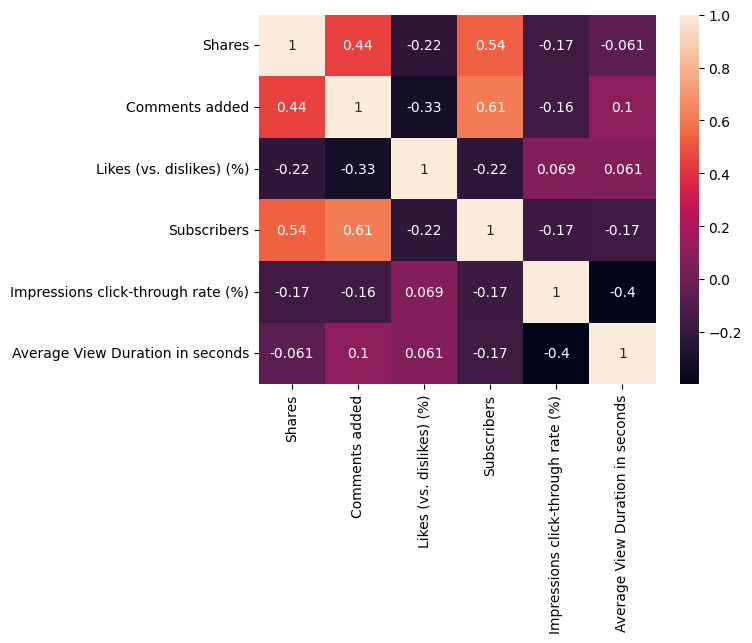

In [18]:
sns.heatmap(data.drop(columns='Views').corr(),annot=True);

In [15]:
data.head()

,Shares,Comments added,Likes (vs. dislikes) (%),Subscribers,Impressions click-through rate (%),Views,Average View Duration in seconds
0,2035.0,1578.0,97.95,3574.0,4.66,4319500.0,572
1,1070.0,1878.0,97.92,4845.0,5.14,2522030.0,638
2,1375.0,4314.0,97.54,8505.0,7.00,3564849.0,571
3,420.0,502.0,98.34,513.0,7.27,1148850.0,366
4,982.0,977.0,97.43,3865.0,5.08,1559413.0,452


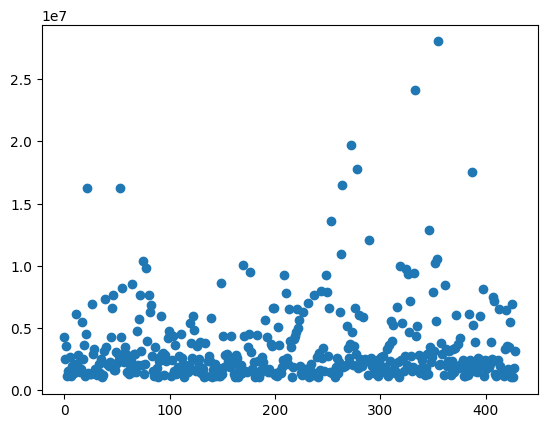

In [16]:
plt.scatter(data['Views'].index,data["Views"]);

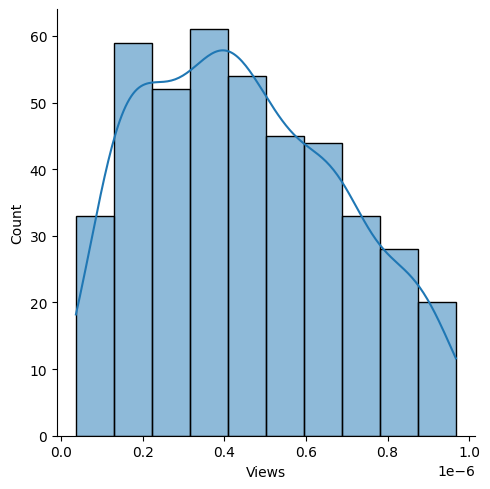

In [ ]:
#Checking the distribution of all the columns as distributions helps in finding out the skewness in the data and Transformed then as some Machine Learning -
# Algorithm required Transformed data to work with
#sns.displot(np.log(data["Subscribers"])); #Log
#sns.displot(np.log(data["Shares"]),kde=True); #Logarithm
#sns.displot(np.log(data['Comments added'])) #Log
#sns.displot(np.exp(data['Likes (vs. dislikes) (%)']),kde=True)# Exponential
#sns.displot(data['Impressions click-through rate (%)'],kde=True) #Normal values
sns.displot(1/(data["Views"]),kde=True); # 1/X

From the above code block, the transformations that are commented are the finalized transformation for the selected columns, these will be used for the experimentations.

In [19]:
transformed_data=data.copy()
transformed_data["Subscribers"]=np.log(transformed_data["Subscribers"])
transformed_data["Shares"]=np.log(transformed_data["Shares"])
transformed_data["Comments added"]=np.log(transformed_data["Comments added"])
transformed_data["Likes (vs. dislikes) (%)"]=np.exp(transformed_data["Likes (vs. dislikes) (%)"])
transformed_data["Views"]=1/(transformed_data["Views"])

In [20]:
transformed_data.head()

,Shares,Comments added,Likes (vs. dislikes) (%),Subscribers,Impressions click-through rate (%),Views,Average View Duration in seconds
0,7.618251,7.363914,3.460545e+42,8.181441,4.66,2.315083e-07,572
1,6.975414,7.537963,3.358270e+42,8.485703,5.14,3.965060e-07,638
2,7.226209,8.369621,2.296592e+42,9.048410,7.00,2.805168e-07,571
3,6.040255,6.218600,5.111159e+42,6.240276,7.27,8.704357e-07,366
4,6.889591,6.884487,2.057365e+42,8.259717,5.08,6.412669e-07,452


# Implementing Linear Regression, KNN and SVR on RAW Data

In [21]:
#Linear Regression, KNN and SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
knn=KNeighborsRegressor()
lr=LinearRegression()
svr=SVR()

In [22]:
X=data.drop(columns='Views')
y=data['Views']

In [23]:
import warnings
from sklearn.model_selection import cross_val_score
import numpy as np

warnings.filterwarnings("ignore")
labels=["KNN","SVR","Linear Regression"]
reg_list=[knn,svr,lr]
for idx, (reg, label) in enumerate(zip(reg_list, labels), 1):
  scores=cross_val_score(reg,X,y,cv=5,scoring="r2")
  print(f"Model {idx}: {label}, Mean R²: {scores.mean():.4f}, Std Dev: {scores.std():.4f}")

Model 1: KNN, Mean R²: 0.6426, Std Dev: 0.1313
Model 2: SVR, Mean R²: -0.1237, Std Dev: 0.0558
Model 3: Linear Regression, Mean R²: 0.7502, Std Dev: 0.1342


In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

2233601041297.6787
0.846145766606809


Although we are getting good accuracy but the MSE (Mean Squared Error) is very high, stating the average distance between actual and predicted values are very high that is not good.

Text(0.5, 1.0, 'Linear Regression - Actual vs Prediction')

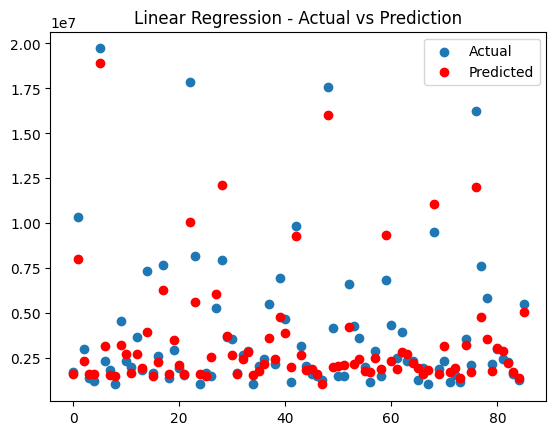

In [25]:
plt.scatter(range(len(y_test)),y_test)
plt.scatter(range(len(y_pred)),y_pred,color='red')
plt.legend(['Actual','Predicted'])
plt.title("Linear Regression - Actual vs Prediction")

In [26]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

2419776688344.976
0.83332167182742


Text(0.5, 1.0, 'Random Forest Regressor - Actual vs Prediction')

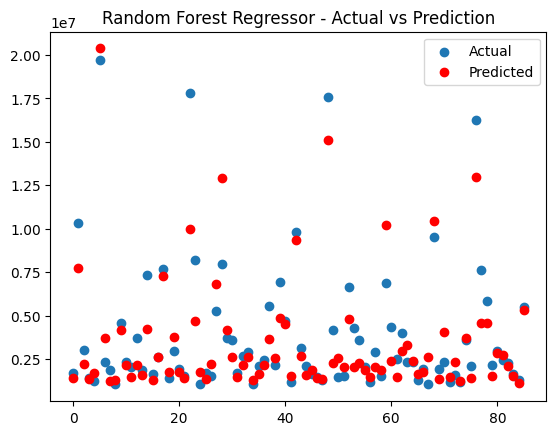

In [27]:
plt.scatter(range(len(y_test)),y_test)
plt.scatter(range(len(y_pred)),y_pred,color='red')
plt.legend(['Actual','Predicted'])
plt.title("Random Forest Regressor - Actual vs Prediction")

In [28]:
#Linear Regression on Transformed Data
from sklearn.preprocessing import MinMaxScaler
X=transformed_data.drop(columns='Views')
y=transformed_data['Views']
scaler=MinMaxScaler()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train["Likes (vs. dislikes) (%)"]=scaler.fit_transform(X_train[["Likes (vs. dislikes) (%)"]])
X_test["Likes (vs. dislikes) (%)"]=scaler.transform(X_test[["Likes (vs. dislikes) (%)"]])
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("MSE ",mean_squared_error(y_test,y_pred))
print("R2 ",r2_score(y_test,y_pred))

MSE  1.8487077688798482e-14
R2  0.6961553557660198


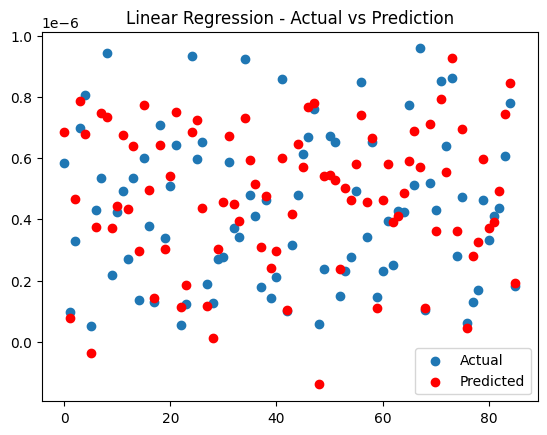

In [29]:
plt.scatter(range(len(y_test)),y_test)
plt.scatter(range(len(y_pred)),y_pred,color='red')
plt.legend(['Actual','Predicted'])
plt.title("Linear Regression - Actual vs Prediction");

In [30]:
#Random Forest Regressor on Transformed Data
X=transformed_data.drop(columns='Views')
y=transformed_data['Views']
scaler=MinMaxScaler()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train["Likes (vs. dislikes) (%)"]=scaler.fit_transform(X_train[["Likes (vs. dislikes) (%)"]])
X_test["Likes (vs. dislikes) (%)"]=scaler.transform(X_test[["Likes (vs. dislikes) (%)"]])
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print("MSE ",mean_squared_error(y_test,y_pred))
print("R2 ",r2_score(y_test,y_pred))

MSE  2.2682530164203432e-14
R2  0.6272009333176098


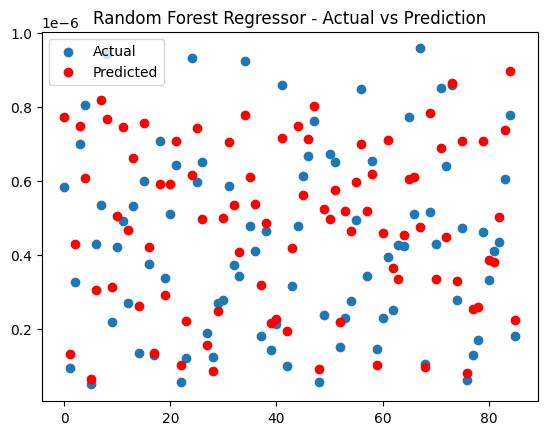

In [31]:
plt.scatter(range(len(y_test)),y_test)
plt.scatter(range(len(y_pred)),y_pred,color='red')
plt.legend(['Actual','Predicted'])
plt.title("Random Forest Regressor - Actual vs Prediction");

# Normalization with Linear Regression, KNN and SVR

In [32]:
#Normalized Data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
column_names=transformed_data.columns
norm_data=scaler.fit_transform(transformed_data)
norm_data=pd.DataFrame(norm_data,columns=column_names)
norm_data.head()

,Shares,Comments added,Likes (vs. dislikes) (%),Subscribers,Impressions click-through rate (%),Views,Average View Duration in seconds
0,0.368107,0.548856,0.310081,0.400205,0.261538,0.210145,0.406897
1,0.265448,0.593646,0.300905,0.452031,0.323077,0.387194,0.482759
2,0.305499,0.807665,0.205646,0.547878,0.561538,0.262733,0.405747
3,0.116107,0.254121,0.458182,0.069562,0.596154,0.895738,0.170115
4,0.251743,0.425480,0.184182,0.413538,0.315385,0.649832,0.268966


In [33]:
#Linear Regression, KNN and SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
knn=KNeighborsRegressor()
lr=LinearRegression()
svr=SVR()

In [34]:
#Working with Normalized Data
import warnings
from sklearn.model_selection import cross_val_score
import numpy as np

X=norm_data.drop(columns='Views')
y=norm_data['Views']
warnings.filterwarnings("ignore")
labels=["KNN","SVR","Linear Regression"]
reg_list=[knn,svr,lr]
for idx, (reg, label) in enumerate(zip(reg_list, labels), 1):
  scores=cross_val_score(reg,X,y,cv=5,scoring="r2")
  print(f"Model {idx}: {label}, Mean R²: {scores.mean():.4f}, Std Dev: {scores.std():.4f}")

Model 1: KNN, Mean R²: 0.6290, Std Dev: 0.0627
Model 2: SVR, Mean R²: 0.6379, Std Dev: 0.0506
Model 3: Linear Regression, Mean R²: 0.6790, Std Dev: 0.0617


In [35]:
#Again Normalizing the data just to eliminate any effects of Data Leakage.
X=transformed_data.drop(columns='Views')
y=transformed_data['Views']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [36]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

1.8487077688798482e-14
0.6961553557660198


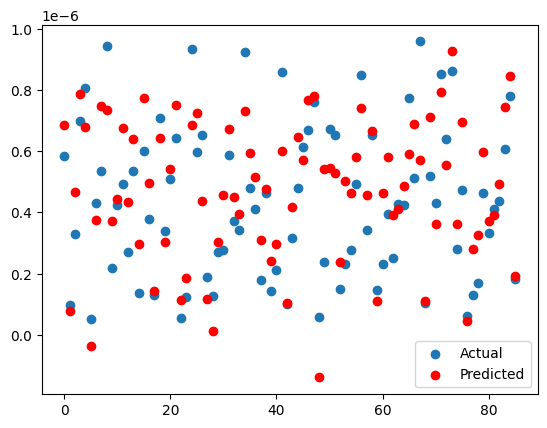

In [37]:
plt.scatter(range(len(y_test)),y_test)
plt.scatter(range(len(y_pred)),y_pred,color='red')
plt.legend(['Actual','Predicted'])

In [38]:
pd.concat([pd.Series(lr.coef_),pd.Series(X.columns)],axis=1).sort_values(0,ascending=False)

,0,1
2,5.055067e-08,Likes (vs. dislikes) (%)
0,-4.628923e-08,Shares
5,-5.091644e-08,Average View Duration in seconds
4,-2.666253e-07,Impressions click-through rate (%)
1,-2.843896e-07,Comments added
3,-8.575024e-07,Subscribers


Above Iteration - Highest Accuracy (r2) is from Linear Regression although standard deviated error is bit high. And with Normalized data we are getting the coefficient values of these column, these coefficeint values can define important features

In [39]:
X=transformed_data.drop(columns='Views')
y=transformed_data['Views']
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [40]:
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
import numpy as np

warnings.filterwarnings("ignore")

lr=LinearRegression()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
svr=SVR(kernel='rbf')
bagging1=BaggingRegressor(estimator=lr, n_estimators=50, random_state=42)
bagging2=BaggingRegressor(estimator=rfr, n_estimators=50, random_state=42)
bagging3=BaggingRegressor(estimator=dtr, n_estimators=50, random_state=42)
bagging4=BaggingRegressor(estimator=svr, n_estimators=50, random_state=42)
boosting1=AdaBoostRegressor(estimator=lr,n_estimators=50, random_state=42)
boosting2=AdaBoostRegressor(estimator=rfr,n_estimators=50, random_state=42)
boosting3=AdaBoostRegressor(estimator=dtr,n_estimators=50, random_state=42)

# List of model labels
labels = ["Linear Regression",
          "Random Forest",
          "Decision Tree",
          "AdaBoost",
          "Gradient Boosting",
          "SVR",
          "Bagging1_Linear",
          "Bagging2_Random",
          "Bagging3_Decision",
          "Bagging4_SVR",
          "Boosting_Linear",
          "Boosting_Random",
          "Bosting_Decision"]


# List of models
reg_list = [lr, rfr, dtr, abr, gbr, svr, bagging1, bagging2, bagging3, bagging4, boosting1,boosting2,boosting3]

# Loop through each model and label, and include the model number
for idx, (reg, label) in enumerate(zip(reg_list, labels), 1):
    scores = cross_val_score(reg, X, y, cv=5, scoring="r2")
    print(f"Model {idx}: {label}, Mean R²: {scores.mean():.4f}, Std Dev: {scores.std():.4f}")

Model 1: Linear Regression, Mean R²: 0.6790, Std Dev: 0.0617
Model 2: Random Forest, Mean R²: 0.6741, Std Dev: 0.0534
Model 3: Decision Tree, Mean R²: 0.4231, Std Dev: 0.0575
Model 4: AdaBoost, Mean R²: 0.6474, Std Dev: 0.0610
Model 5: Gradient Boosting, Mean R²: 0.6685, Std Dev: 0.0452
Model 6: SVR, Mean R²: -0.0754, Std Dev: 0.0663
Model 7: Bagging1_Linear, Mean R²: 0.6784, Std Dev: 0.0598
Model 8: Bagging2_Random, Mean R²: 0.6902, Std Dev: 0.0495
Model 9: Bagging3_Decision, Mean R²: 0.6830, Std Dev: 0.0442
Model 10: Bagging4_SVR, Mean R²: -0.0768, Std Dev: 0.0683
Model 11: Boosting_Linear, Mean R²: 0.6724, Std Dev: 0.0502
Model 12: Boosting_Random, Mean R²: 0.6728, Std Dev: 0.0645
Model 13: Bosting_Decision, Mean R²: 0.6407, Std Dev: 0.0404


In [41]:
#K-Nearest Neighbours
r2=[]
mse=[]
for i in range(1,50):
  knn.set_params(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  r2.append(r2_score(y_test,y_pred))
  mse.append(mean_squared_error(y_test,y_pred))
print(np.mean(sorted(r2,reverse=True)[:5]))
print(np.mean(sorted(mse)[:5]))

0.6822540161259087
1.9332888700386376e-14


In [42]:
#Implementing PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)
lr.fit(X_train_pca,y_train)
y_pred=lr.predict(X_test_pca)
print("MSE",mean_squared_error(y_test,y_pred))
print("R2",r2_score(y_test,y_pred))

MSE 1.8576234257890858e-14
R2 0.6946900216297649


In [43]:
rfr.fit(X_train_pca,y_train)
y_pred=rfr.predict(X_test_pca)
print("MSE",mean_squared_error(y_test,y_pred))
print("R2",r2_score(y_test,y_pred))

MSE 1.9550822766683182e-14
R2 0.6786721574917268


Even implementing PCA the algorithm is not able to perform well.

# Standardization with Linear Regression, KNN and SVR

In [44]:
transformed_data=data.copy()
transformed_data["Subscribers"]=np.log(transformed_data["Subscribers"])
transformed_data["Shares"]=np.log(transformed_data["Shares"])
transformed_data["Comments added"]=np.log(transformed_data["Comments added"])
transformed_data["Likes (vs. dislikes) (%)"]=np.exp(transformed_data["Likes (vs. dislikes) (%)"])
transformed_data["Views"]=1/(transformed_data["Views"])

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
column_names=transformed_data.columns
scaled_data=scaler.fit_transform(transformed_data)
scaled_data=pd.DataFrame(scaled_data,columns=column_names)
scaled_data.head()

,Shares,Comments added,Likes (vs. dislikes) (%),Subscribers,Impressions click-through rate (%),Views,Average View Duration in seconds
0,0.210126,0.230502,-0.007469,-0.198238,-0.837257,-0.909449,0.160935
1,-0.516103,0.446567,-0.057862,0.082849,-0.405308,-0.218941,0.624865
2,-0.232774,1.478991,-0.580971,0.602697,1.268492,-0.704350,0.153906
3,-1.572575,-1.191295,0.805818,-1.991553,1.511463,1.764434,-1.287087
4,-0.613059,-0.364661,-0.698842,-0.125924,-0.459302,0.805373,-0.682573


In [46]:
X=scaled_data.drop(columns='Views')
y=scaled_data['Views']

In [47]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
knn=KNeighborsRegressor()
lr=LinearRegression()
svr=SVR()

In [48]:
import warnings
from sklearn.model_selection import cross_val_score
import numpy as np

warnings.filterwarnings("ignore")
labels=["KNN","SVR","Linear Regression"]
reg_list=[knn,svr,lr]
for idx, (reg, label) in enumerate(zip(reg_list, labels), 1):
  scores=cross_val_score(reg,X,y,cv=5,scoring="r2")
  print(f"Model {idx}: {label}, Mean R²: {scores.mean():.4f}, Std Dev: {scores.std():.4f}")

Model 1: KNN, Mean R²: 0.6214, Std Dev: 0.0734
Model 2: SVR, Mean R²: 0.6486, Std Dev: 0.0573
Model 3: Linear Regression, Mean R²: 0.6790, Std Dev: 0.0617


In [49]:
#Again Standardizing the data just to eliminate any effects of Data Leakage.
X=transformed_data.drop(columns='Views')
y=transformed_data['Views']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [50]:
lr_train=LinearRegression()
lr_test=LinearRegression()
lr_train.fit(X_train,y_train)
lr_test.fit(X_test,y_test)
y_pred_test=lr_train.predict(X_test)
y_pred_train=lr_test.predict(X_train)
print("MSE Test ",mean_squared_error(y_test,y_pred_test))
print("MSE Train", mean_squared_error(y_train,y_pred_train))
print()
print("R2 ",r2_score(y_test,y_pred))
print("R2 ",r2_score(y_train,y_pred_train))

MSE Test  1.8487077688798517e-14
MSE Train 2.2242091165155368e-14

R2  0.6786721574917268
R2  0.6035572162413934


The Above metric shows the model might be **Underfitting**, however very less MSE indicates that average distance between actual values and predicted values are less.

Let's explore few more Options.

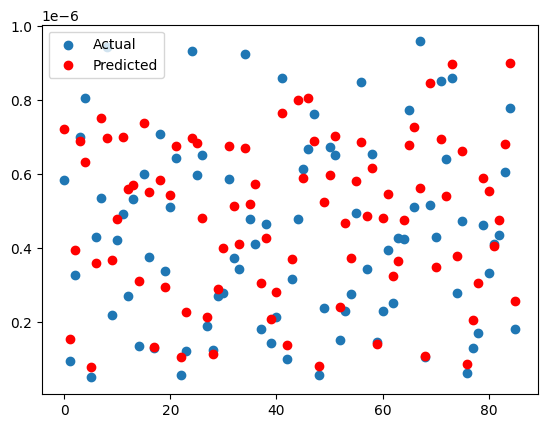

In [51]:
plt.scatter(range(len(y_test)),y_test)
plt.scatter(range(len(y_pred)),y_pred,color='red')
plt.legend(['Actual','Predicted'])

In [52]:
pd.concat([pd.Series(lr_train.coef_),pd.Series(X.columns)],axis=1).sort_values(0,ascending=False)

,0,1
2,9.142621e-09,Likes (vs. dislikes) (%)
0,-6.725785e-09,Shares
5,-8.338201e-09,Average View Duration in seconds
4,-3.851032e-08,Impressions click-through rate (%)
1,-5.968758e-08,Comments added
3,-1.510181e-07,Subscribers


In [53]:
X=scaled_data.drop(columns='Views')
y=scaled_data['Views']

In [54]:
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
import numpy as np

warnings.filterwarnings("ignore")

lr=LinearRegression()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
svr=SVR(kernel='rbf')
bagging1=BaggingRegressor(estimator=lr, n_estimators=50, random_state=42)
bagging2=BaggingRegressor(estimator=rfr, n_estimators=50, random_state=42)
bagging3=BaggingRegressor(estimator=dtr, n_estimators=50, random_state=42)
bagging4=BaggingRegressor(estimator=svr, n_estimators=50, random_state=42)
boosting1=AdaBoostRegressor(estimator=lr,n_estimators=50, random_state=42)
boosting2=AdaBoostRegressor(estimator=rfr,n_estimators=50, random_state=42)
boosting3=AdaBoostRegressor(estimator=dtr,n_estimators=50, random_state=42)

# List of model labels
labels = ["Linear Regression",
          "Random Forest",
          "Decision Tree",
          "AdaBoost",
          "Gradient Boosting",
          "SVR",
          "Bagging1_Linear",
          "Bagging2_Random",
          "Bagging3_Decision",
          "Bagging4_SVR",
          "Boosting_Linear",
          "Boosting_Random",
          "Bosting_Decision"]


# List of models
reg_list = [lr, rfr, dtr, abr, gbr, svr, bagging1, bagging2, bagging3, bagging4, boosting1,boosting2,boosting3]

# Loop through each model and label, and include the model number
for idx, (reg, label) in enumerate(zip(reg_list, labels), 1):
    scores = cross_val_score(reg, X, y, cv=5, scoring="r2")
    print(f"Model {idx}: {label}, Mean R²: {scores.mean():.4f}, Std Dev: {scores.std():.4f}")

Model 1: Linear Regression, Mean R²: 0.6790, Std Dev: 0.0617
Model 2: Random Forest, Mean R²: 0.6753, Std Dev: 0.0548
Model 3: Decision Tree, Mean R²: 0.4158, Std Dev: 0.0681
Model 4: AdaBoost, Mean R²: 0.6512, Std Dev: 0.0526
Model 5: Gradient Boosting, Mean R²: 0.6697, Std Dev: 0.0472
Model 6: SVR, Mean R²: 0.6486, Std Dev: 0.0573
Model 7: Bagging1_Linear, Mean R²: 0.6784, Std Dev: 0.0598
Model 8: Bagging2_Random, Mean R²: 0.6901, Std Dev: 0.0494
Model 9: Bagging3_Decision, Mean R²: 0.6821, Std Dev: 0.0479
Model 10: Bagging4_SVR, Mean R²: 0.6558, Std Dev: 0.0525
Model 11: Boosting_Linear, Mean R²: 0.6724, Std Dev: 0.0502
Model 12: Boosting_Random, Mean R²: 0.6750, Std Dev: 0.0601
Model 13: Bosting_Decision, Mean R²: 0.6336, Std Dev: 0.0503


In [55]:
#Final Iteration will be having Bagging Random Forest with StandardScaler with no 1/X transformation
from sklearn.preprocessing import StandardScaler
transformed_data=data.copy()
transformed_data["Subscribers"]=np.log(transformed_data["Subscribers"])
transformed_data["Shares"]=np.log(transformed_data["Shares"])
transformed_data["Comments added"]=np.log(transformed_data["Comments added"])
transformed_data["Likes (vs. dislikes) (%)"]=np.exp(transformed_data["Likes (vs. dislikes) (%)"])
#transformed_data["Views"]=1/(transformed_data["Views"])

X=transformed_data.drop(columns='Views')
y=transformed_data['Views']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#scaler=StandardScaler()
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
y_train=scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test=scaler.transform(np.array(y_test).reshape(-1,1))

rfr=RandomForestRegressor(n_estimators=50,
                          criterion='squared_error',
                          oob_score=True,
                          max_depth=5)
rfr_bagging=BaggingRegressor(estimator=rfr, n_estimators=50, random_state=42)

rfr_bagging.fit(X_train,y_train)
y_pred=rfr_bagging.predict(X_test)
print("MSE ",mean_squared_error(y_test,y_pred))
print("R2 ",r2_score(y_test,y_pred))

MSE  0.003282141227738635
R2  0.8351407248072512


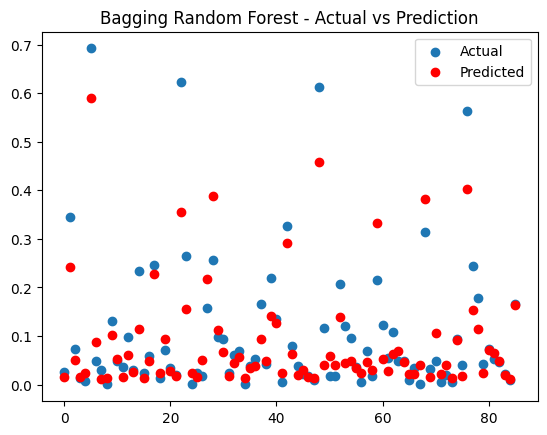

In [56]:
plt.scatter(range(len(y_test)),y_test)
plt.scatter(range(len(y_pred)),y_pred,color='red')
plt.legend(['Actual','Predicted'])
plt.title("Bagging Random Forest - Actual vs Prediction");

In [ ]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Base RandomForestRegressor
rfr = RandomForestRegressor(random_state=42)

# Bagging Regressor using RandomForest as the base estimator
rfr_bagging = BaggingRegressor(estimator=rfr, random_state=42)

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(5, 50),  # Number of Bagging estimators (range: 5 to 50)
    'estimator__n_estimators': randint(50, 200),  # Number of trees in RandomForest (range: 50 to 200)
    'estimator__criterion': ['squared_error', 'absolute_error'],  # Criteria for RandomForest
    'estimator__max_depth': [None, 5, 10, 15],  # Max depth of RandomForest trees
    'estimator__oob_score': [True, False],  # Out-of-bag samples for RandomForest
    'bootstrap': [True, False],  # Whether Bagging samples with replacement
    'bootstrap_features': [True, False],  # Whether Bagging samples features with replacement
}

scoring = {
    'r2': 'r2',
    'neg_mse': 'neg_mean_squared_error'
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rfr_bagging,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    scoring=scoring,
    refit='r2',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    random_state=42,
    verbose=2
)

# Assuming you have features X_train and target y_train
# Fit the random search to the data
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters:", best_params)
print("Best R2 Score:", best_score)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'bootstrap': False, 'bootstrap_features': False, 'estimator__criterion': 'absolute_error', 'estimator__max_depth': 5, 'estimator__n_estimators': 188, 'estimator__oob_score': True, 'n_estimators': 20}
Best R2 Score: 0.7820897716101756


In [57]:
#K-Nearest Neighbours
r2=[]
mse=[]
for i in range(1,50):
  knn.set_params(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  r2.append(r2_score(y_test,y_pred))
  mse.append(mean_squared_error(y_test,y_pred))
print("MSE ",np.mean(sorted(mse)[:5]))
print("R2 ",np.mean(sorted(r2,reverse=True)[:5]))

MSE  0.00492680898572774
R2  0.7525304055975018


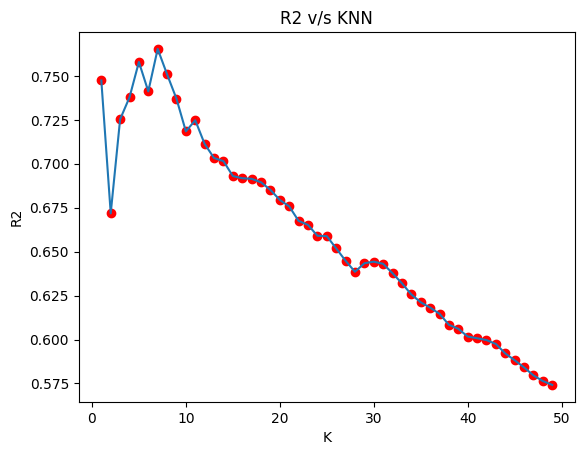

In [58]:
plt.plot(range(1,50),r2)
plt.scatter(range(1,50),r2,color="r")
plt.title("R2 v/s KNN")
plt.xlabel("K")
plt.ylabel("R2");

In [59]:
#Implementing PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)
lr.fit(X_train_pca,y_train)
y_pred=lr.predict(X_test_pca)
print("MSE",mean_squared_error(y_test,y_pred))
print("R2",r2_score(y_test,y_pred))

MSE 0.00711886780616548
R2 0.6424250800670017


# Implementing RandomForest, Decision Tree, Bagging, Boosting and Neural Netoworks on RAW data

In [60]:
#Working with RAW Data
X=data.drop(columns='Views')
y=data['Views']

In [61]:
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
import numpy as np

warnings.filterwarnings("ignore")

lr=LinearRegression()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
abr=AdaBoostRegressor()
gbr=GradientBoostingRegressor()
svr=SVR(kernel='rbf')
bagging1=BaggingRegressor(estimator=lr, n_estimators=50, random_state=42)
bagging2=BaggingRegressor(estimator=rfr, n_estimators=50, random_state=42)
bagging3=BaggingRegressor(estimator=dtr, n_estimators=50, random_state=42)
bagging4=BaggingRegressor(estimator=svr, n_estimators=50, random_state=42)
boosting1=AdaBoostRegressor(estimator=lr,n_estimators=50, random_state=42)
boosting2=AdaBoostRegressor(estimator=rfr,n_estimators=50, random_state=42)
boosting3=AdaBoostRegressor(estimator=dtr,n_estimators=50, random_state=42)

# List of model labels
labels = ["Linear Regression",
          "Random Forest",
          "Decision Tree",
          "AdaBoost",
          "Gradient Boosting",
          "SVR",
          "Bagging1_Linear",
          "Bagging2_Random",
          "Bagging3_Decision",
          "Bagging4_SVR",
          "Boosting_Linear",
          "Boosting_Random",
          "Bosting_Decision"]


# List of models
reg_list = [lr, rfr, dtr, abr, gbr, svr, bagging1, bagging2, bagging3, bagging4, boosting1,boosting2,boosting3]

# Loop through each model and label, and include the model number
for idx, (reg, label) in enumerate(zip(reg_list, labels), 1):
    scores = cross_val_score(reg, X, y, cv=5, scoring="r2")
    print(f"Model {idx}: {label}, Mean R²: {scores.mean():.4f}, Std Dev: {scores.std():.4f}")

Model 1: Linear Regression, Mean R²: 0.7502, Std Dev: 0.1342
Model 2: Random Forest, Mean R²: 0.7456, Std Dev: 0.0900
Model 3: Decision Tree, Mean R²: 0.5480, Std Dev: 0.2889
Model 4: AdaBoost, Mean R²: 0.6654, Std Dev: 0.1610
Model 5: Gradient Boosting, Mean R²: 0.7121, Std Dev: 0.1327
Model 6: SVR, Mean R²: -0.1237, Std Dev: 0.0558
Model 7: Bagging1_Linear, Mean R²: 0.7527, Std Dev: 0.1427
Model 8: Bagging2_Random, Mean R²: 0.7497, Std Dev: 0.0851
Model 9: Bagging3_Decision, Mean R²: 0.7408, Std Dev: 0.0994
Model 10: Bagging4_SVR, Mean R²: -0.1238, Std Dev: 0.0548
Model 11: Boosting_Linear, Mean R²: 0.7227, Std Dev: 0.1723
Model 12: Boosting_Random, Mean R²: 0.7386, Std Dev: 0.1008
Model 13: Bosting_Decision, Mean R²: 0.7156, Std Dev: 0.1200


In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Create a Sequential model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Second hidden layer
model.add(Dense(units=32, activation='relu'))

# Third hidden layer (optional)
model.add(Dense(units=16, activation='relu'))

# Output layer (no activation function for regression)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Model summary
model.summary()

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0181 - val_loss: 0.0081
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0066 - val_loss: 0.0065
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0061 - val_loss: 0.0048
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0057 - val_loss: 0.0041
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0067 - val_loss: 0.0038
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0061 - val_loss: 0.0034
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0050 - val_loss: 0.0032
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0041 - val_loss: 0.0031
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0047 - val_loss: 0.0031
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0048 - val_loss: 0.0027
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0039 - val_loss: 0.0028
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0028 - val_loss: 0.

In [63]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss}")

# Predict on new data
predictions = model.predict(X_test)
print(r2_score(y_test, predictions))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0035 
Test Loss (MSE): 0.004247186705470085
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
0.7866672643691069


In [64]:
!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.9 MB/s eta 0:00:00


In [65]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

def build_model(hp):
    model = Sequential()

    # Tune number of units in the first hidden layer
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32),
                    activation=hp.Choice('activation_1', values=['relu', 'tanh']),
                    input_dim=X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    # Tune number of units in the second hidden layer
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32),
                    activation=hp.Choice('activation_2', values=['relu', 'tanh'])))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    # Optionally add a third hidden layer
    model.add(Dense(units=hp.Int('units_3', min_value=32, max_value=128, step=32),
                    activation=hp.Choice('activation_3', values=['relu', 'tanh'])))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_3', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer (no activation for regression)
    model.add(Dense(units=1))

    # Tune optimizer type and learning rate
    optimizer_name = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')

    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model

# Set up the Keras Tuner search
tuner = kt.Hyperband(
    build_model,  # The model-building function
    objective='val_loss',  # The objective metric to optimize (validation loss)
    max_epochs=10,  # Maximum number of epochs to train for each trial
    factor=3,  # Factor for the reduction of resources (epochs) in each search round
    directory='my_dir',  # Directory to store the results
    project_name='regression_tuning_new'  # Name of the project
)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Summary of the best model
best_model.summary()

# Evaluate the best model on the test set
loss = best_model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss}")

# Predict on new data
predictions = best_model.predict(X_test)
print("r2",r2_score(y_test,predictions))

Trial 30 Complete [00h 00m 05s]
val_loss: 0.013194501399993896

Best val_loss So Far: 0.007097064517438412
Total elapsed time: 00h 02m 27s


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 96)                  │           6,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 96)                  │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              97 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,841 (46.25 KB)

 Trainable params: 11,393 (44.50 KB)

 Non-trainable params: 448 (1.75 KB)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0130  
Test Loss (MSE): 0.011572551913559437
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
r2 0.4187201313267679


In [66]:
#Working on Transformed Data
X=transformed_data.drop(columns='Views')
y=transformed_data['Views']

#X=data.drop(columns='Views')
#y=data['Views']

In [67]:
#Mandatory execution of this code in order for the below code to work properly,
#because values in like vs dislikes column is very large this causes error in calculations
scaler=MinMaxScaler()
X["Likes (vs. dislikes) (%)"]=scaler.fit_transform(X[["Likes (vs. dislikes) (%)"]])

In [68]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
import numpy as np

warnings.filterwarnings("ignore")

lr = LinearRegression()
rfr = RandomForestRegressor()
dtr = DecisionTreeRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
svr = SVR(kernel='rbf')
bagging1 = BaggingRegressor(estimator=lr, n_estimators=50, random_state=42)
bagging2 = BaggingRegressor(estimator=rfr, n_estimators=50, random_state=42)
bagging3 = BaggingRegressor(estimator=dtr, n_estimators=50, random_state=42)
bagging4 = BaggingRegressor(estimator=svr, n_estimators=50, random_state=42)
boosting1 = AdaBoostRegressor(estimator=lr, n_estimators=50, random_state=42)
boosting2 = AdaBoostRegressor(estimator=rfr, n_estimators=50, random_state=42)
boosting3 = AdaBoostRegressor(estimator=dtr, n_estimators=50, random_state=42)

# List of model labels
labels = ["Linear Regression",
          "Random Forest",
          "Decision Tree",
          "AdaBoost",
          "Gradient Boosting",
          "SVR",
          "Bagging1_Linear",
          "Bagging2_Random",
          "Bagging3_Decision",
          "Bagging4_SVR",
          "Boosting_Linear",
          "Boosting_Random",
          "Boosting_Decision"]

# List of models
reg_list = [lr, rfr, dtr, abr, gbr, svr, bagging1, bagging2, bagging3, bagging4, boosting1, boosting2, boosting3]

# Loop through each model and label
for idx, (reg, label) in enumerate(zip(reg_list, labels), 1):
    scores = cross_validate(reg, X, y, cv=5, scoring={"r2": "r2", "mse": "neg_mean_squared_error"})
    mean_r2 = scores["test_r2"].mean()
    std_r2 = scores["test_r2"].std()

    print(f"Model {idx}: {label}, Mean R²: {mean_r2:.4f}, Std R²: {std_r2:.4f}")


Model 1: Linear Regression, Mean R²: 0.5422, Std R²: 0.1624
Model 2: Random Forest, Mean R²: 0.7429, Std R²: 0.0933
Model 3: Decision Tree, Mean R²: 0.5553, Std R²: 0.2787
Model 4: AdaBoost, Mean R²: 0.6740, Std R²: 0.1440
Model 5: Gradient Boosting, Mean R²: 0.7131, Std R²: 0.1317
Model 6: SVR, Mean R²: -0.1237, Std R²: 0.0558
Model 7: Bagging1_Linear, Mean R²: 0.5461, Std R²: 0.1579
Model 8: Bagging2_Random, Mean R²: 0.7492, Std R²: 0.0859
Model 9: Bagging3_Decision, Mean R²: 0.7386, Std R²: 0.1019
Model 10: Bagging4_SVR, Mean R²: -0.1239, Std R²: 0.0548
Model 11: Boosting_Linear, Mean R²: 0.3334, Std R²: 0.3231
Model 12: Boosting_Random, Mean R²: 0.7348, Std R²: 0.1078
Model 13: Boosting_Decision, Mean R²: 0.7206, Std R²: 0.1067


In [69]:
#Again Normalizing the data just to eliminate any effects of Data Leakage.
X=transformed_data.drop(columns='Views')
y=transformed_data['Views']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [71]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

def build_model(hp):
    model = Sequential()

    # Tune number of units in the first hidden layer
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32),
                    activation=hp.Choice('activation_1', values=['relu', 'tanh']),
                    input_dim=X_train.shape[1]))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))

    # Tune number of units in the second hidden layer
    model.add(Dense(units=hp.Int('units_2', min_value=32, max_value=128, step=32),
                    activation=hp.Choice('activation_2', values=['relu', 'tanh'])))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))

    # Optionally add a third hidden layer
    model.add(Dense(units=hp.Int('units_3', min_value=32, max_value=128, step=32),
                    activation=hp.Choice('activation_3', values=['relu', 'tanh'])))
    model.add(BatchNormalization())
    model.add(Dropout(rate=hp.Float('dropout_3', min_value=0.1, max_value=0.5, step=0.1)))

    # Output layer (no activation for regression)
    model.add(Dense(units=1))

    # Tune optimizer type and learning rate
    optimizer_name = hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop'])
    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')

    if optimizer_name == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_name == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model

# Set up the Keras Tuner search
tuner = kt.Hyperband(
    build_model,  # The model-building function
    objective='val_loss',  # The objective metric to optimize (validation loss)
    max_epochs=10,  # Maximum number of epochs to train for each trial
    factor=3,  # Factor for the reduction of resources (epochs) in each search round
    directory='my_dir_new',  # Directory to store the results
    project_name='regression_tuning_new'  # Name of the project
)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Summary of the best model
best_model.summary()

# Evaluate the best model on the test set
loss = best_model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {loss}")

# Predict on new data
predictions = best_model.predict(X_test)
print("r2",r2_score(y_test,predictions))

Trial 24 Complete [00h 00m 04s]
val_loss: nan

Best val_loss So Far: 21492874084352.0
Total elapsed time: 00h 01m 55s


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 96)                  │           6,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 96)                  │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 96)                  │           9,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 96)                  │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              97 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,121 (66.88 KB)

 Trainable params: 16,609 (64.88 KB)

 Non-trainable params: 512 (2.00 KB)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 32088157847552.0000 
Test Loss (MSE): 29547107975168.0


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
r2 -1.0352550256900068


* After conducting numerous iterations and experimentations, I discovered that a Random Forest Regression model performs best on the dataset.
* The primary reason for this outcome is likely the size of the data, which consists of 430 rows and 6 columns.
* Although the data had already been cleaned, there were still some outliers present.
* I prefer to consult with the team and seniors before addressing outliers, as they could represent valuable or true information about the data.
* While outliers can be treated, their significance often depends on the context and the insights they provide within the dataset.

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Define transformers
log_transformer = FunctionTransformer(np.log, validate=True)
exp_transformer = FunctionTransformer(np.exp, validate=True)
scaler = MinMaxScaler()

# Create the pipeline
pipeline=Pipeline(steps=[
    ('column_transformer',ColumnTransformer(remainder='passthrough',
                                            transformers=[('log_transformation',
                                                           log_transformer,
                                                           [0,1,3])])),
    ('column_transformer2',ColumnTransformer(remainder='passthrough',
                                             transformers=[('exponential_transformation',
                                                            exp_transformer,
                                                            [3])])),
    ('column_transformer3',ColumnTransformer(remainder='passthrough',
                                             transformers=[('Normalization',
                                                            MinMaxScaler(),
                                                            [0,1,2,3,4,5])]))
])


In [73]:
transformed_data.columns


Index(['Shares', 'Comments added', 'Likes (vs. dislikes) (%)', 'Subscribers',
       'Impressions click-through rate (%)', 'Views',
       'Average View Duration in seconds'],
      dtype='object')

In [74]:
transformed_data=data.copy()
transformed_data.head()

,Shares,Comments added,Likes (vs. dislikes) (%),Subscribers,Impressions click-through rate (%),Views,Average View Duration in seconds
0,2035.0,1578.0,97.95,3574.0,4.66,4319500.0,572
1,1070.0,1878.0,97.92,4845.0,5.14,2522030.0,638
2,1375.0,4314.0,97.54,8505.0,7.00,3564849.0,571
3,420.0,502.0,98.34,513.0,7.27,1148850.0,366
4,982.0,977.0,97.43,3865.0,5.08,1559413.0,452


In [75]:
np.log(data["Shares"]).head(3)

,Shares
0,7.618251
1,6.975414
2,7.226209


Final Model contains of all the transfomrations on the Independent features and only Normalized Target variable combined with RandomFOrest

In [76]:
transformed_data=data.copy()
transformed_data["Subscribers"]=np.log(transformed_data["Subscribers"])
transformed_data["Shares"]=np.log(transformed_data["Shares"])
transformed_data["Comments added"]=np.log(transformed_data["Comments added"])
transformed_data["Likes (vs. dislikes) (%)"]=np.exp(transformed_data["Likes (vs. dislikes) (%)"])
transformed_data["Likes (vs. dislikes) (%)"]=MinMaxScaler().fit_transform(transformed_data[["Likes (vs. dislikes) (%)"]])
#transformed_data["Views"]=1/transformed_data["Views"]
scaler=MinMaxScaler()
#for i in range(transformed_data.shape[1]):
#  transformed_data.iloc[:,i]=scaler.fit_transform(transformed_data.iloc[:,i].values.reshape(-1,1))
transformed_data.head()

,Shares,Comments added,Likes (vs. dislikes) (%),Subscribers,Impressions click-through rate (%),Views,Average View Duration in seconds
0,7.618251,7.363914,0.310081,8.181441,4.66,4319500.0,572
1,6.975414,7.537963,0.300905,8.485703,5.14,2522030.0,638
2,7.226209,8.369621,0.205646,9.048410,7.00,3564849.0,571
3,6.040255,6.218600,0.458182,6.240276,7.27,1148850.0,366
4,6.889591,6.884487,0.184182,8.259717,5.08,1559413.0,452


In [77]:
reciprocal_transformer = FunctionTransformer(lambda x: 1 / x)

# Define the inverse transformation (also 1/X)
reciprocal_inverse_transformer = FunctionTransformer(lambda x: 1 / x, validate=True)

In [78]:
1/transformed_data['Views'].head()

,Views
0,2.315083e-07
1,3.965060e-07
2,2.805168e-07
3,8.704357e-07
4,6.412669e-07


In [79]:
reciprocal_transformer.transform(transformed_data[['Views']])[:5]

,Views
0,2.315083e-07
1,3.965060e-07
2,2.805168e-07
3,8.704357e-07
4,6.412669e-07


In [80]:
transformed_data=data.copy()
X=transformed_data.drop(columns='Views')
#y=reciprocal_transformer.transform(transformed_data[['Views']])
y=transformed_data['Views']

X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [81]:
col_names=X_train.columns

In [82]:
X_train=pd.DataFrame(pipeline.fit_transform(X_train),columns=col_names)
X_test=pd.DataFrame(pipeline.transform(X_test),columns=col_names)

In [83]:
scaler = MinMaxScaler()
y_train=scaler.fit_transform(y_train.values.reshape(-1,1))
y_test=scaler.transform(y_test.values.reshape(-1,1))

#y_train=scaler.fit_transform(y_train)
#y_test=scaler.transform(y_test)

In [84]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
print("MSE",mean_squared_error(y_test,pred))
print('r2',r2_score(y_test,pred))

MSE 0.0070510770937504364
r2 0.6458301522251075


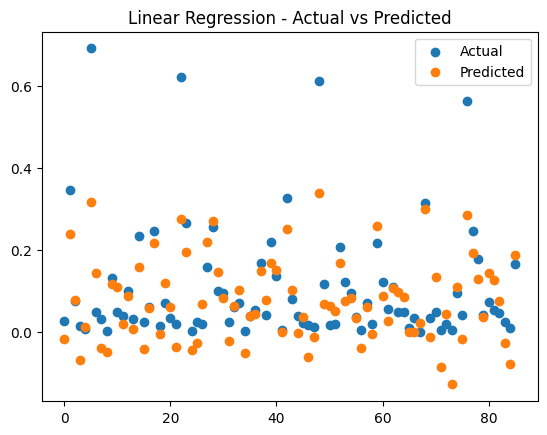

In [85]:
plt.scatter(range(len(y_test)),y_test)
plt.scatter(range(len(y_test)),pred)
plt.title("Linear Regression - Actual vs Predicted")
plt.legend(["Actual","Predicted"]);

In [109]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(criterion='absolute_error', max_depth= 5, n_estimators=10)
rfr.fit(X_train,y_train)
pred=rfr.predict(X_test)
print("MSE",mean_squared_error(y_test,pred))
print('r2',r2_score(y_test,pred))

MSE 0.003133613429044044
r2 0.8426011549166634


In [110]:
rfr.feature_importances_
X_train.columns
pd.concat([pd.DataFrame(X_train.columns,columns=["Namings"]),pd.DataFrame(rfr.feature_importances_,columns=["Scores"])],axis=1).sort_values("Scores",ascending=False).reset_index(drop=True)

,Namings,Scores
0,Subscribers,0.756752
1,Likes (vs. dislikes) (%),0.122897
2,Average View Duration in seconds,0.035712
3,Comments added,0.035496
4,Impressions click-through rate (%),0.034659
5,Shares,0.014483


In [111]:
X_train_data=pipeline.transform(X)
y_train_data=scaler.transform(y.values.reshape(-1,1))
rfr_final_model=rfr.fit(X_train_data,y)

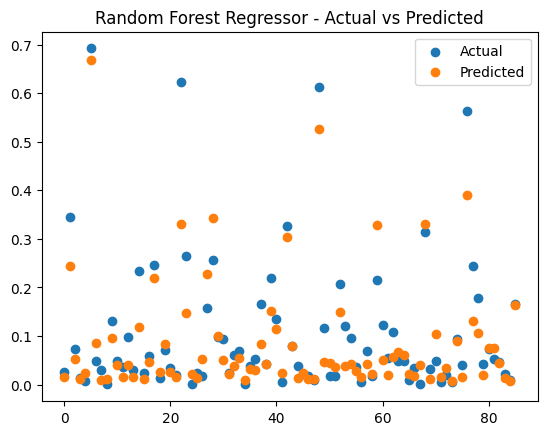

In [112]:
plt.scatter(range(len(y_test)),y_test)
plt.scatter(range(len(y_test)),pred)
plt.title("Random Forest Regressor - Actual vs Predicted")
plt.legend(["Actual","Predicted"]);

In [113]:
#Working on Test Data (X_test)
test_data=pd.read_csv("X_test.csv").drop(columns="Views prediction")
test_data.head()

,Shares,Comments added,Likes (vs. dislikes) (%),Average view duration,Subscribers,Impressions click-through rate (%)
0,27558,3243,95.66,00:11:10,28895,4.84
1,575,942,98.10,00:10:59,879,5.99
2,5362,1903,95.28,00:06:27,10362,5.98
3,1231,465,93.65,00:10:26,3119,5.35
4,4115,2126,97.16,00:13:42,10311,3.55


In [114]:
#Applying all the pre-processing techniques on the test data.
test_data["Average View Duration in seconds"] = test_data["Average view duration"].apply(time_to_seconds)
test_data.drop(columns="Average view duration",inplace=True)
test_data=test_data[['Shares', 'Comments added', 'Likes (vs. dislikes) (%)', 'Subscribers',
       'Impressions click-through rate (%)',
       'Average View Duration in seconds']]

In [115]:
test_data.head()

,Shares,Comments added,Likes (vs. dislikes) (%),Subscribers,Impressions click-through rate (%),Average View Duration in seconds
0,27558,3243,95.66,28895,4.84,670
1,575,942,98.10,879,5.99,659
2,5362,1903,95.28,10362,5.98,387
3,1231,465,93.65,3119,5.35,626
4,4115,2126,97.16,10311,3.55,822


In [116]:
rfr.predict(pd.DataFrame(pipeline.transform(test_data),columns=test_data.columns))

array([ 8425847.4 ,  1547485.  ,  4879131.  ,  2420681.8 ,  4284774.1 ,
        3943488.65,  4805378.8 ,  6826090.05,  5969188.3 ,  4550898.5 ,
        9540237.2 ,  3443497.6 ,  4176751.4 ,  4844049.7 ,  1356564.9 ,
        1838801.95,  3447047.85,  1200711.1 ,  1955988.65,  1582292.65,
        6760391.95,  3298247.4 ,  4314881.7 ,  2118637.  , 11652107.5 ,
        5094190.95,  2496490.5 ,  1580025.25,  2289797.45,  1829444.1 ,
        3009496.9 ,  4089312.6 ,  2420558.95,  1860010.45,  4258304.95,
        2773292.5 ,  1230173.65,  1584369.6 ,  1386340.85,  5238566.6 ,
        1465073.55,  8610934.7 ,  2057251.95,  3121046.95,  6335473.75,
        2680336.7 ,  8197905.75,  1601478.75,  1276627.6 ,  3008820.1 ,
        1597952.85,  2171312.2 ,  4452865.1 ,  6792640.8 ,  1477352.75,
        1827262.55,  2681748.05,  5573366.5 ,  1539307.2 ,  1745304.55,
        3387657.4 ,  1450408.05,  3204656.95,  1596481.95,  5030666.3 ,
       16946652.65,  2635653.5 ,  1762434.35,  2854257.75,  1439

In [117]:
test_data["Views prediction"]=rfr.predict(pd.DataFrame(pipeline.transform(test_data),columns=test_data.columns))

In [118]:
test_data["Views prediction"]=np.round(test_data["Views prediction"])

In [ ]:
test_data.to_csv("X_test_predictions.csv",index=False)

In [119]:
new_data=pd.read_csv('/content/X_test_predictions.csv')

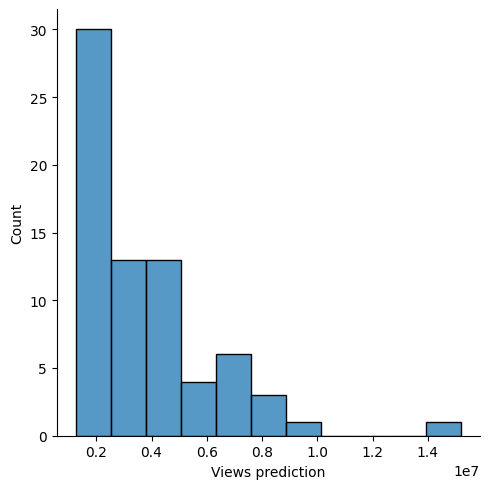

In [120]:
#Distirbution of new predicted values
sns.displot(new_data["Views prediction"]);

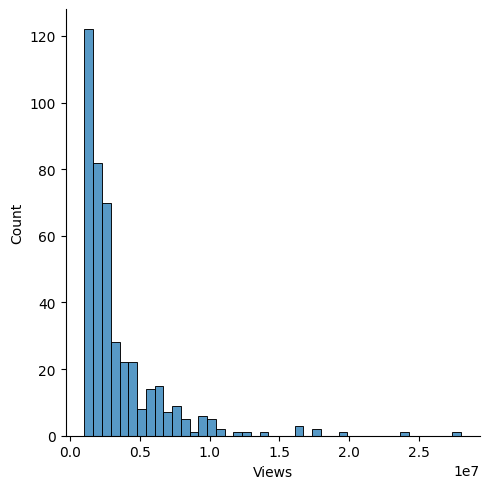

In [121]:
#Distribution of trained data
sns.displot(data["Views"]);

1. **Explain your choice of model and why it is suitable for this problem**
* Out of many different algorithms and their iterations I selected Random Forest Regressor algorithm, the primary reason for this selection is likely the size of the data, which consists of 430 rows and 6 columns.
* Although the data had already been cleaned, there were still some outliers present.
* I prefer to consult with the team and seniors before addressing outliers, as they could represent valuable or true information about the data.
* While outliers can be treated, their significance often depends on the context and the insights they provide within the dataset.

2. **Comment on your model’s performance as well as the significance of each feature.**

* Random Forest Regressor helps in giving the **accuracy** of **84.26%** and **MSE(Mean Squared Error) 0.00313**, which means on an average the difference between actual and predicted values could be **0.00313**.

3. **Provide predictions for views of videos within X_test.csv, as well as an estimation of your out-of-sample performance.**

* The predictions have been saved in the file names as **X_test_predictions.csv**, and for the** estimations of the model**. I have compared the distribution of **Views** in **Training data** and **Predcitions(Views)** on the new **predictions** and both the values are following **same distribution**.

In [122]:
import pandas as pd
all_data=pd.read_excel("/content/VIDEO A.xlsx").iloc[:100,:]
new_returning=pd.read_excel("/content/VIDEO A.xlsx",sheet_name=1)
subscribers=pd.read_excel("/content/VIDEO A.xlsx",sheet_name=2)
organic=pd.read_excel("/content/VIDEO A.xlsx",sheet_name=3)
last_file=pd.read_excel("/content/VIDEO A.xlsx",sheet_name=5)
last_file

,Video position (%),Absolute audience retention (%),Compared to other videos (%)
0,0,109.33,50.19
1,1,89.72,64.00
2,2,86.35,68.31
3,3,84.39,64.39
4,4,83.40,60.35
...,...,...,...
95,95,53.31,-6.05
96,96,52.77,-6.94
97,97,51.88,-3.79
98,98,38.78,1.67


In [123]:
new_returning.head()

,Video position (%),New and Returning Viewers,Absolute audience retention (%)
0,0,New viewers,113.38
1,0,Returning viewers,100.07
2,1,New viewers,88.49
3,1,Returning viewers,86.60
4,2,New viewers,82.84


In [124]:
latest_new_returning=new_returning.drop(columns='New and Returning Viewers').groupby(["Video position (%)"]).mean().reset_index(drop=True)
latest_new_returning

,Absolute audience retention (%)
0,106.725
1,87.545
2,82.615
3,82.295
4,77.810
...,...
95,43.025
96,42.305
97,41.360
98,30.160


In [125]:
latest_subscribers=subscribers.drop(columns='Subscription status').groupby(["Video position (%)"]).mean().reset_index(drop=True)
latest_subscribers

,Absolute audience retention (%)
0,106.530
1,89.070
2,85.690
3,83.765
4,82.830
...,...
95,53.600
96,53.050
97,52.150
98,39.055


In [126]:
#last_file.groupby("Video position (%)").mean()
last_file.drop("Video position (%)",axis=1)

,Absolute audience retention (%),Compared to other videos (%)
0,109.33,50.19
1,89.72,64.00
2,86.35,68.31
3,84.39,64.39
4,83.40,60.35
...,...,...
95,53.31,-6.05
96,52.77,-6.94
97,51.88,-3.79
98,38.78,1.67


In [127]:
organic.drop("Audience type",axis=1)
complete_data=pd.concat([latest_new_returning,latest_subscribers,organic.drop("Audience type",axis=1),last_file.drop(["Video position (%)","Compared to other videos (%)"],axis=1)],axis=1)
complete_data.drop("Video position (%)",axis=1).mean(axis=0)

,0
Absolute audience retention (%),54.82175
Absolute audience retention (%),65.31740
Absolute audience retention (%),65.33980
Absolute audience retention (%),65.33980


In [128]:
import numpy as np
latest_complete_data=complete_data.groupby("Video position (%)").mean()
np.round(latest_complete_data.mean(axis=1).head(6),2).values

array([107.98,  89.01,  85.25,  83.71,  81.86,  80.35])

In [ ]:
organic["Absolute audience retention (%)"].head()

,Absolute audience retention (%)
0,109.33
1,89.72
2,86.35
3,84.39
4,83.40


In [129]:
final=latest_complete_data.mean(axis=1)
final.head()

,0
Video position (%),
0,107.97875
1,89.01375
2,85.25125
3,83.71000
4,81.86000


In [130]:
organic["Absolute audience retention (%)"]-final

,0
0,1.35125
1,0.70625
2,1.09875
3,0.68000
4,1.54000
...,...
95,2.49875
96,2.54625
97,2.56250
98,2.08625


### Using the audience retention graphs of the videos within the folder ‘’Task 2 & 3’’ predict the audience retention % of Video A at positions 0, 1, 2, 3, 4, 5 by inputting your answers in the yellow fields. Explain your reasoning and how you got to this number.

The Approach that I took to find the values for **audience retention %** was to average out the values for every video position and if there's a file that is categorized for each video position then I grouped them on Video position and combined all the files into one single file and grouped for each video position with average. And when compared the values that are present in Organic sub sheet because all the values are very similar to the values present in "all sub sheet", the difference is quite low as you can see in the above table(output).

However, I had some doubts regarding the prescence of multiple sheets in the file and the meaning of the values they contained. Additionally, I faced some challenges due to a lack of clear direction. I believe I could perform much better if I receive further clarification and updates regarding the task requirements.